In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

Contrôle de spin sur la sphère
==============================


On s'intéresse au contrôle de l'orientation d'un spin dans un champ magnétique, problème que l'on rencontre dans diverses applications comme l'imagerie médicale (IRM) ou l'ordinateur quantique. 
Un spin (ou qubit en informatique quantique) peut se représenter par un vecteur $\psi \in  \mathbb{R}^3$ de la sphère (*sphère de Bloch*)
$$
S^2= \{ (x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2=1 \} 
$$
et on cherche à simuler son comportement lorsqu'il est placé dans un champ magnétique externe. Plus particulièrement, on voudrait simuler un *transfert de population*, c'est à dire un choix de champ magnétique permettant de faire passer une population de $p$ spins de la position initiale $-e_z = (0,0,-1)$ à la position finale $e_z=(0,0,1)$ en un temps $T$ donné. Les spins n'ayant pas tous exactement les mêmes propriétés de couplage avec le champ magnétique ambiant, il faut que ce transfert soit *robuste*, c'est-à-dire les amenant tous au voisinage de la cible malgré leur hétérogénéité.

Notre système dynamique est donc composé de $p$ sous-systèmes indépendants $(\psi_1,\ldots,\psi_i,\ldots,\psi_p)$, chacun évoluant selon
$$ 
\dot\psi_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0)\in S^2 \tag{1}, \qquad i\in\{1,\ldots, p \}
$$
où $\psi_i\in \mathbb{R}^3$ décrit l'orientation du spin $i$, $r_i(t)\in \mathbb{R}^3$ est le champ magnétique externe ``vu'' par le spin $i$ au temps $t$, et $\wedge$ dénote le produit vectoriel. 

En pratique, on est souvent dans la situation suivante : un champ magnétique $E$ intense selon l'axe $Oz$ fixe, et un champ contrôlable $u(t)$, à choisir, selon l'axe $Ox$. Selon les propriétés de couplage magnétique de chaque spin, chaque spin reçoit alors le champ magnétique
$$
r_i(t)=(\delta_i u(t),0,E_i)
$$ 
avec $E_i\in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min},\delta_{\max}]$, pour des paramètres $E, \alpha, \delta_{\min},\delta_{\max}$ décrivant l'hétérogénité du système.

Les paramètres $E_i$ et $\delta_i$ de chaque spin étant inconnus, on cherche alors à effectuer un transfert de population *robuste*, c'est-à-dire assurant que tous les spins atteignent une orientation très proche de la cible $e_z$ malgré les incertitudes sur $E_i$ et $\delta_i$ et se basant seulement sur la connaissance de leurs intervalles.


## Simulation du transfert d'un spin sur la sphère

**Question 1** 

**1a** Justifier que toute solution du problème de Cauchy 
$$ 
\dot\psi = r(t) \wedge \psi, \qquad \psi(0)\in S^2 
$$
reste sur la sphère $S^2$ en tous temps. 

**Réponse**

Soit $\psi$ une solution du problème de Cauchy en question. On sait que $\psi$ est dérivable, et donc que $\psi\cdot\psi$ l'est aussi. On a alors à tout instant : 
$$
\frac{d}{dt}(\psi\cdot\psi) = 2 \psi\cdot\dot\psi
$$
Or on sait que $\dot\psi = r(t)\wedge\psi$. Par propriété du produit vectoriel, $$\psi\perp(r(t)\wedge\psi)$$ et donc $$\psi\cdot\dot\psi=0$$
Finalement, 
$$
\frac{d}{dt}(\psi\cdot\psi) = 0
$$
Ainsi, $\psi\cdot\psi$ est une constante. Or on sait que $\psi\cdot\psi=\lVert \psi\rVert ^2 $. 
On vient de montrer que $\forall t \in [0,T]$,   $$\lVert \psi(t)\rVert ^2 = \lVert\psi(0)\rVert ^2 = 1 $$
Ainsi, toute solution du problème de Cauchy reste sur la sphère $S^2$.

On introduit les matrices anti-symétriques suivantes
$$\Omega_x=\left(\begin{matrix}
0& 0 &0 \\
0& 0 &-1 \\
0& 1 &0 \\
\end{matrix}\right), \qquad \Omega_y=\left(\begin{matrix}
0& 0 &1 \\
0& 0 &0 \\
-1& 0 &0 \\
\end{matrix}\right), \qquad
\Omega_z=\left(\begin{matrix}
0& -1 &0 \\
1& 0 & 0 \\
0& 0 &0 \\
\end{matrix}\right). $$

**1b** Vérifier que pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$
c'est-à-dire que $\Omega_x$ (resp. $\Omega_y,\Omega_z$)  est la représentation matricielle de l'application linéaire $\psi \mapsto e_x \wedge \psi$ (resp. $\psi \mapsto e_y \wedge \psi$, $\psi \mapsto e_z \wedge \psi$).

L'équation $(1)$ se réécrit donc 
$$
\dot\psi_i= (E_i \Omega_z+ \delta_i u(t) \Omega_x )\psi_i, \qquad \psi_i(0)\in S^2 \tag{2}
$$
c'est-à-dire sous forme d'une équation différentielle linéaire, décrite par une matrice $E_i \Omega_z+ \delta_i u(t) \Omega_x$ dépendant du temps.

**Réponse**

Si on pose
$$
\psi = \left(\begin{matrix}
\psi_x\\
\psi_y\\
\psi_z\\
\end{matrix}\right) 
$$

Alors 

$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) 
\wedge 
\left(\begin{matrix}
\psi_x\\
\psi_y\\
\psi_z\\
\end{matrix}\right) 
=
\left(\begin{matrix}
r_y\psi_z - r_z\psi_y\\
r_z\psi_x - r_x\psi_z\\
r_x\psi_y - r_y\psi_x\\
\end{matrix}\right)
$$
Et donc on a bien 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$

**Question 2** On cherche à simuler l'équation (2) numériquement, d'abord dans le cas où il y a un seul spin et sans incertitude, c'est-à-dire 
$$
\dot\psi= (E \Omega_z+ \delta u(t) \Omega_x )\psi, \qquad \psi(0)=-e_z \tag{3}
$$
avec $T=50$, $E=2$, $\delta=1$ et la commande 
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ \frac{\sin(\pi t/T)}{\pi/T}\right) 
$$

**2a** Coder un schéma Euler explicite résolvant l'équation différentielle (3). Tracer l'évolution de la norme de $\psi$. Interpréter.

**2b** Même question avec un schéma Euler implicite.

**2c** Proposer et coder un schéma qui reprojette l'état sur la sphère à chaque pas de temps. Comparer. Tracer la loi de contrôle $t\mapsto u(t)$ et la trajectoire du spin $t\mapsto \psi(t)$ en 3D. Commenter.

__Réponse__

In [2]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi *t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])

def f(t, psi, E, delta):
    return (E*Omega_z + u(t)*delta*Omega_x).dot(psi)

def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    psi = [psi_0]
    norme_psi = [np.linalg.norm(psi_0)]
    time = [t_0]
    t = t_0
    k = 0
    while t_0 + k*dt < t_f :
        psi.append(psi[-1] + dt*f(t,psi[-1], E, delta))
        norme_psi.append(np.linalg.norm(psi[-1]))
        t += dt
        time.append(t)
        k +=1
    plt.plot(time, norme_psi)
    plt.xlabel('t')
    plt.ylabel('Norme de psi')
    plt.show()
    return None

def euler_implicit(psi_0,t_0,t_f,E,delta,dt):
    psi = [psi_0]
    norme_psi = [np.linalg.norm(psi_0)]
    time = [t_0]
    t = t_0
    k = 0
    while t_0 + k*dt < t_f :
        psi_suiv = np.linalg.solve(np.identity(3)-dt*(E*Omega_z+delta*u(t)*Omega_x), psi[-1])
        psi.append(psi_suiv)
        norme_psi.append(np.linalg.norm(psi[-1]))
        t += dt
        time.append(t)
        k += 1
    plt.plot(time, norme_psi)
    plt.xlabel('t')
    plt.ylabel('Norme de psi')
    plt.show()
    return None

def euler_projete(psi_0,t_0,t_f,E,delta,dt):
    psi = [psi_0]
    psi_x = [psi_0[0]]
    psi_y = [psi_0[1]]
    psi_z = [psi_0[2]]
    time = [t_0]
    u_values = [u(t_0)]
    t = t_0
    k = 0
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    while t_0 + k*dt < t_f :
        psi_suiv = np.linalg.solve(np.identity(3)-dt*(E*Omega_z+delta*u(t)*Omega_x), psi[-1])
        psi_suiv = psi_suiv/np.linalg.norm(psi_suiv)
        psi.append(psi_suiv)
        psi_x.append(psi_suiv[0])
        psi_y.append(psi_suiv[1])
        psi_z.append(psi_suiv[2])
        t += dt
        time.append(t)
        u_values.append(u(t))
        k += 1
    ax.plot(psi_x, psi_y, psi_z)
    plt.show()
    plt.plot(time, u_values)
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.show()
    return None

__2. a.__

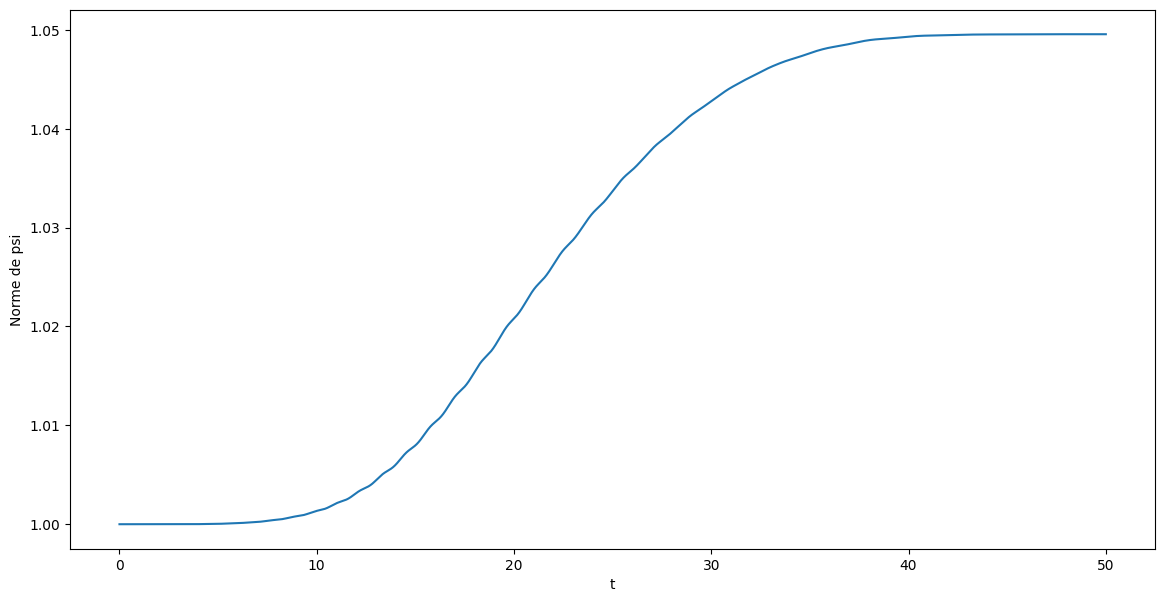

In [3]:
euler_explicit(psi_0, 0, T, E, delta, dt)

La norme de $\psi$ reste très proche de 1, ce qui est cohérent avec le résultat montré en 1) a). Le fait que $\psi$ prenne des valeurs à l'extérieur de la sphère témoigne cependant de la précision limitée de cette méthode.   

__2. b.__

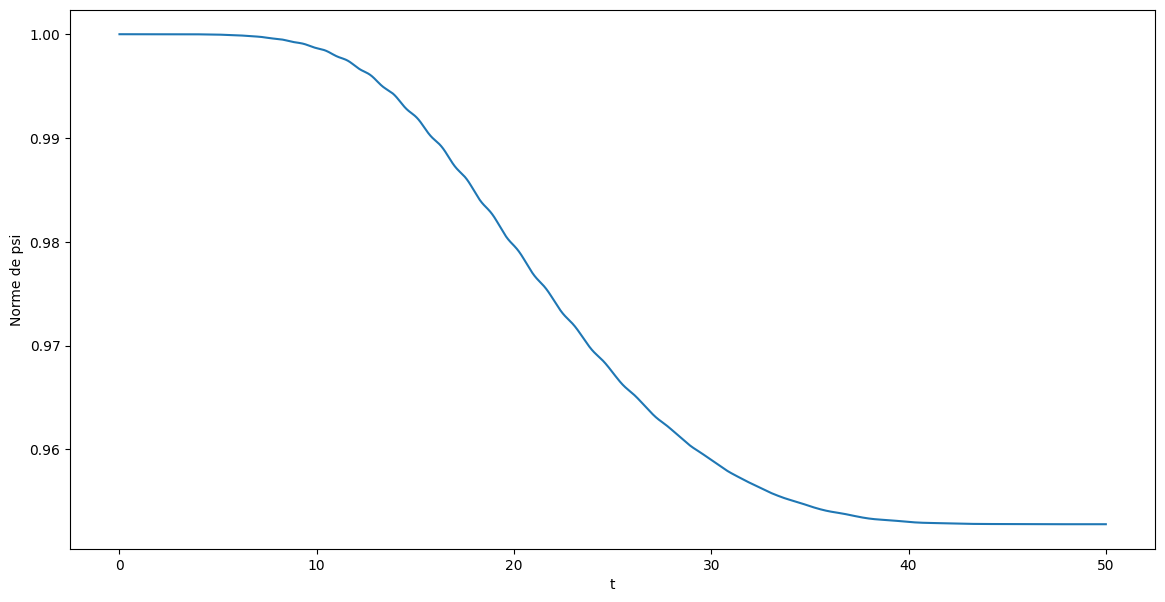

In [4]:
euler_implicit(psi_0, 0, T, E, delta, dt)

On constate que la norme de $\psi$ reste également très proche de 1, ce qui est toujours cohérent avec le résultat montré en 1) a). Mais contrairement à ce à quoi l'on pourrait s'attendre, cette méthode de résolution implicite ne semble pas plus précise que la méthode explicite précédemment éprouvée. En effet, l'écart observé entre la norme de $\psi(T)$ et 1 (norme du vecteur cible, $-e_z$) est dans les deux cas très proche de $5.10^-2$. La principale différence observable entre les deux méthodes est le fait qu'au lieu de s'étendre au cours du temps (en sens d'avoir une norme croissante) comme dans l'essai précédent, $\psi$ reste à l'intérieur de la sphère (sa norme décroît).

__2. c.__

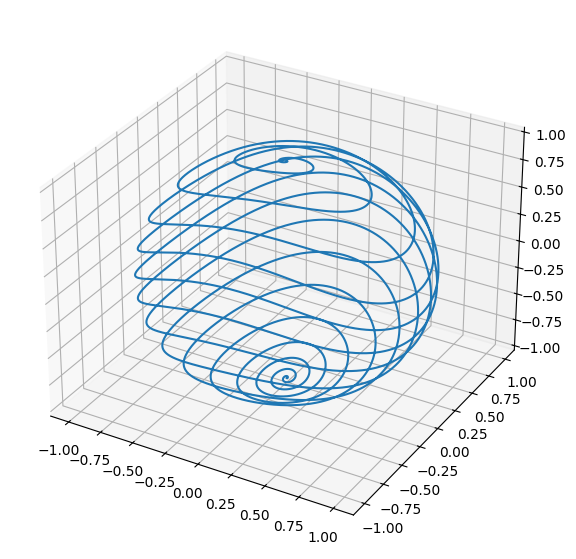

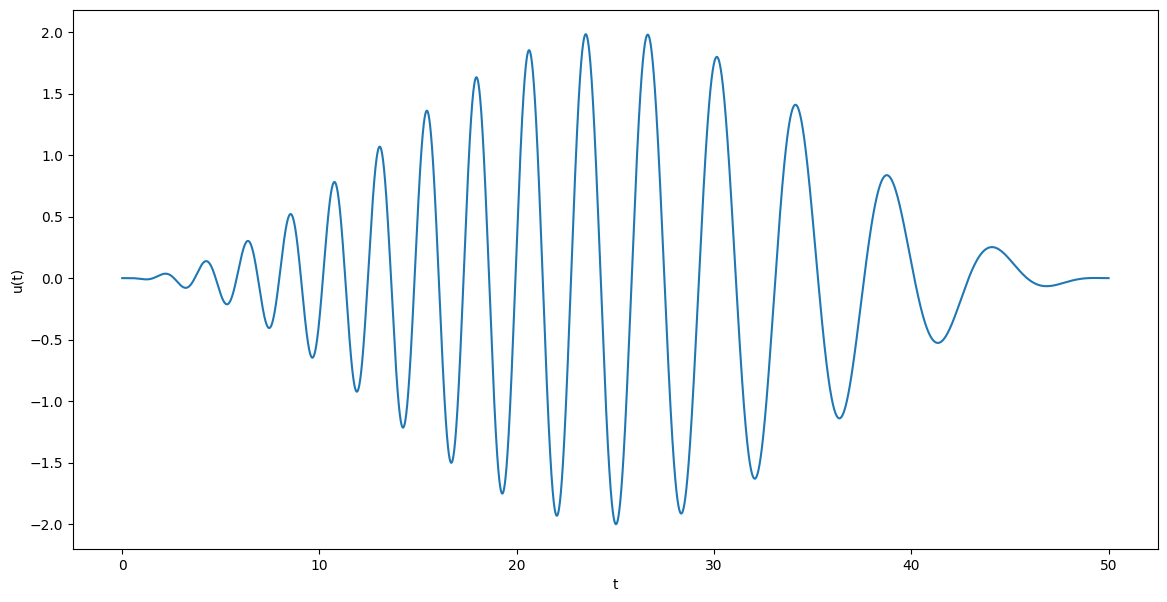

In [5]:
euler_projete(psi_0, 0, T, E, delta, dt)

La reprojection de $\psi$ sur la sphère à chaque étape permet d'obtenir un résultat très satisfaisant, assurant un redressement de $\psi$ vers $e_z$ pour l'instant $T$. Cela confirme l'efficacité de la loi de contrôle. 

---
**Vocabulaire // ouverture mathématique**

$S^2$ est une surface dans $\mathbb{R}^3$, c'est un cas particulier de **variété différentielle**. L'équation (2) assure que si $\psi$ appartient à la variété, $\dot \psi$ appartient au **plan tangent** en $\psi$ de $S^2$ et donc que $S^2$ est invariant par la dynamique. Pour des simulations en temps long sur des variétés il est souvent important de s'assurer que la dynamique discrete (celle du schéma numérique) reste exactement sur la variété (et non approximativement)

---

## Robustesse et simulation du transfert d'un ensemble de spins

On considère maintenant un ensemble de $p$ spins évoluant chacun selon (2) mais avec différentes valeurs de $E_i \in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min}, \delta_{\max}]$. On souhaite vérifier que le même contrôle $u$ fonctionne sur tous simultanément, c'est-à-dire évaluer sa robustesse.

**Question 3**

Simuler $p=10$ spins avec la méthode retenue ci-dessus, en faisant varier $E_i$ puis $\delta_i$. Vérifier que pour $\alpha = 0.5$, $\delta_{\min}= 0.4$ et $\delta_{\max}= 3.5$, la même loi de contrôle $u$ assure tout de même la transition de $-e_z$ à $e_z$ avec une excellente précision à évaluer.

__Réponse__

In [6]:
E=2
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi *t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
e_z = -psi_0
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])
alpha = 0.5
delta_min = 0.4
delta_max = 2.5
p = 10

def simu_systeme(psi_0, t_0, t_f, E, dt, alpha, delta_min, delta_max, p):
    psi_finaux = []
    for i in range(p) :
        E_i = E-alpha + np.random.uniform()*2*alpha
        delta_i = delta_min + np.random.uniform()*(delta_max-delta_min)
        psi = [psi_0]
        psi_x = [psi_0[0]]
        psi_y = [psi_0[1]]
        psi_z = [psi_0[2]]
        time = [t_0]
        t = t_0
        k = 0
        while t_0 + k*dt < t_f :
            psi_suiv = np.linalg.solve(np.identity(3)-dt*(E_i*Omega_z+delta_i*u(t)*Omega_x), psi[-1])
            psi_suiv = psi_suiv/np.linalg.norm(psi_suiv)
            psi.append(psi_suiv)
            psi_x.append(psi_suiv[0])
            psi_y.append(psi_suiv[1])
            psi_z.append(psi_suiv[2])
            t += dt
            time.append(t)
            k += 1
        psi_finaux.append(psi[-1])
        fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
        ax.plot(psi_x, psi_y, psi_z)
        plt.show()
        print(f'E_i = {E_i}, delta_i = {delta_i}')
    mean, var = 0, 0
    for psi_f in psi_finaux :
        mean += np.linalg.norm(psi_f-e_z)/p
        var += (np.linalg.norm(psi_f)/p)**2
    print(f'\nMean : {mean}, \nStandard deviation : {np.sqrt(var)}')

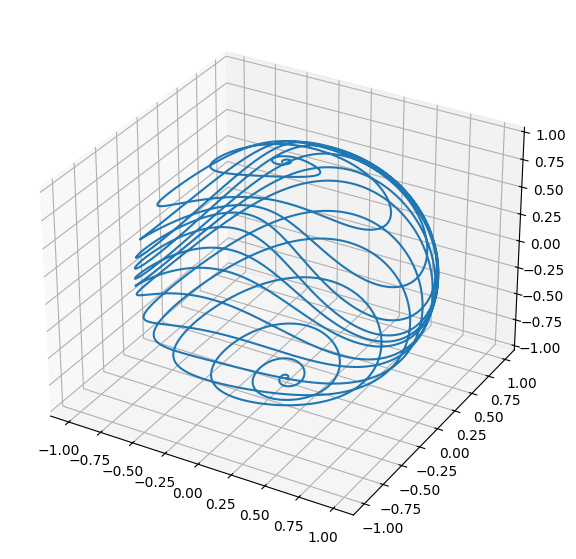

E_i = 2.2567706484041166, delta_i = 1.8365591230552383


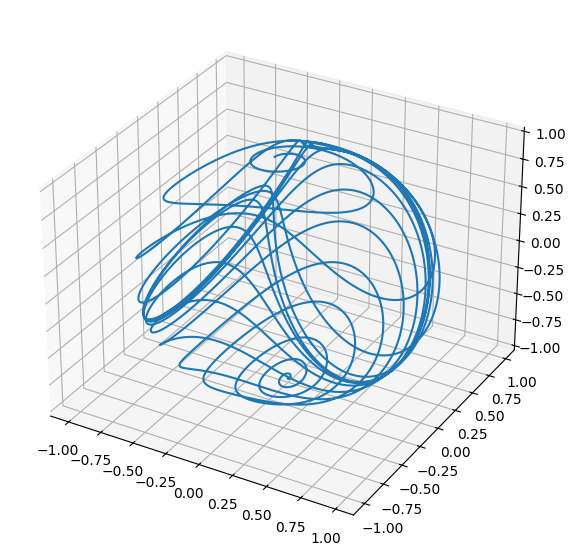

E_i = 1.7193638804853095, delta_i = 2.425780457034606


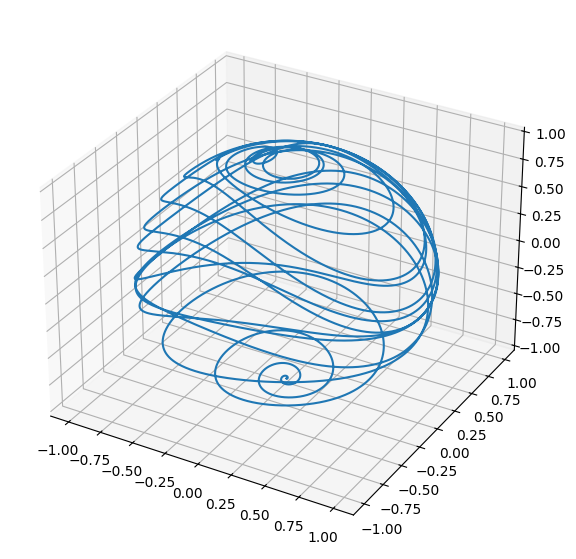

E_i = 2.488064591387469, delta_i = 1.358427044573638


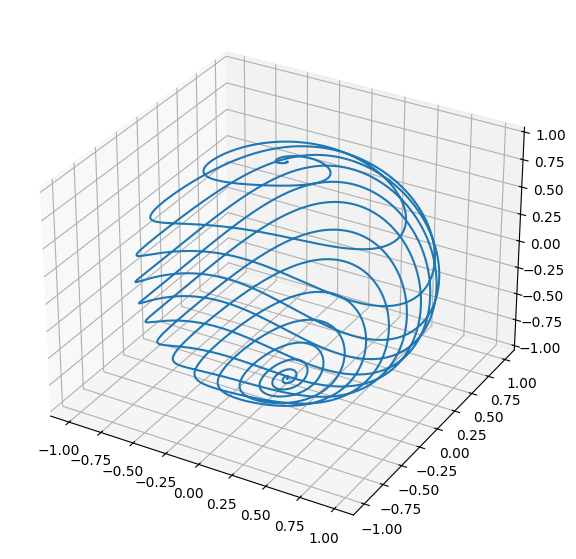

E_i = 1.7484642213341646, delta_i = 1.2079854165634631


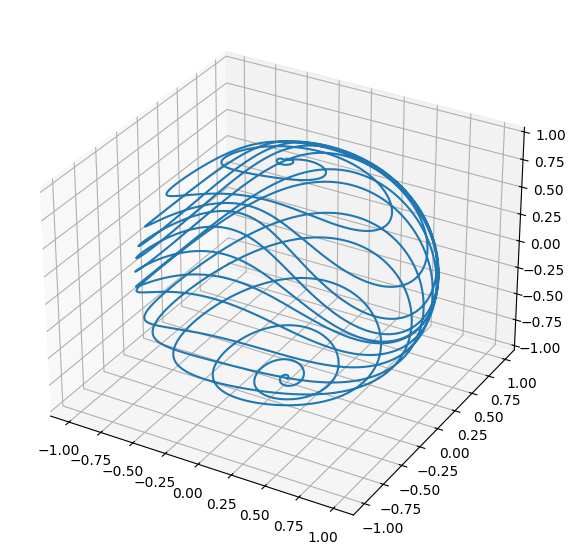

E_i = 2.2845402531970396, delta_i = 1.7375259176062774


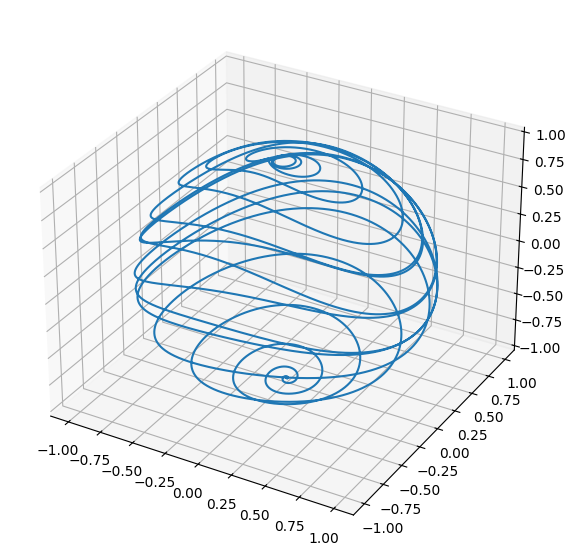

E_i = 2.4147648606195053, delta_i = 1.0654341987128497


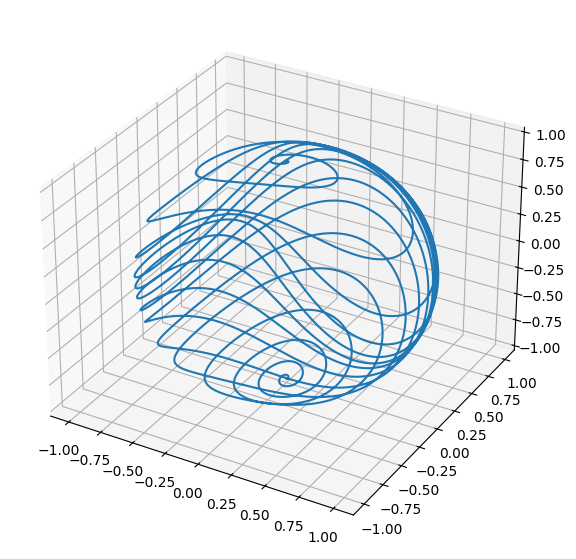

E_i = 1.9544292416902347, delta_i = 1.8830244157718363


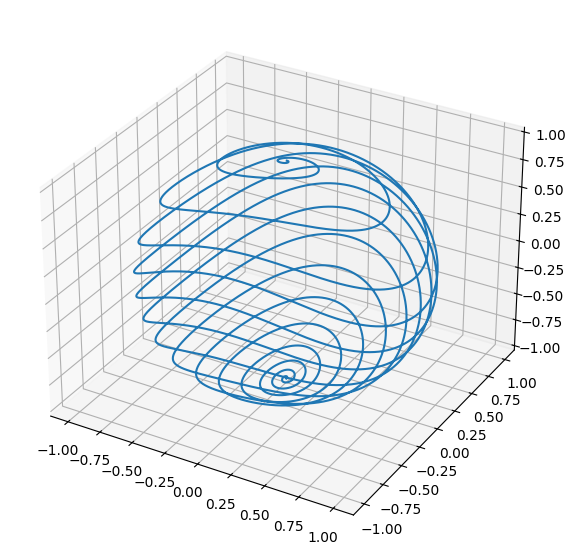

E_i = 1.8246597466791123, delta_i = 1.0591486509451604


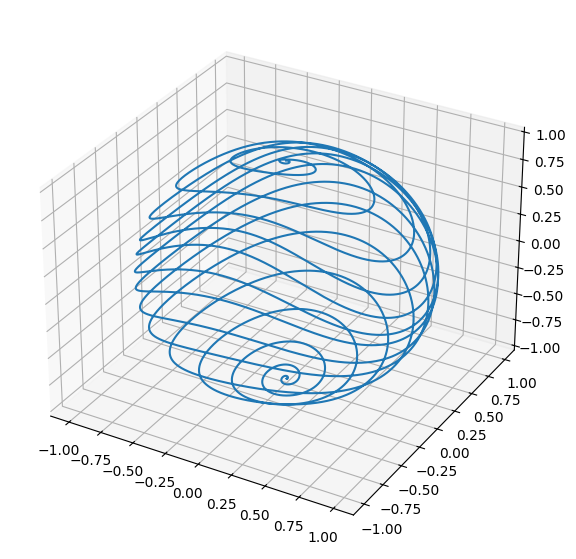

E_i = 2.233650147776507, delta_i = 1.3331123725577314


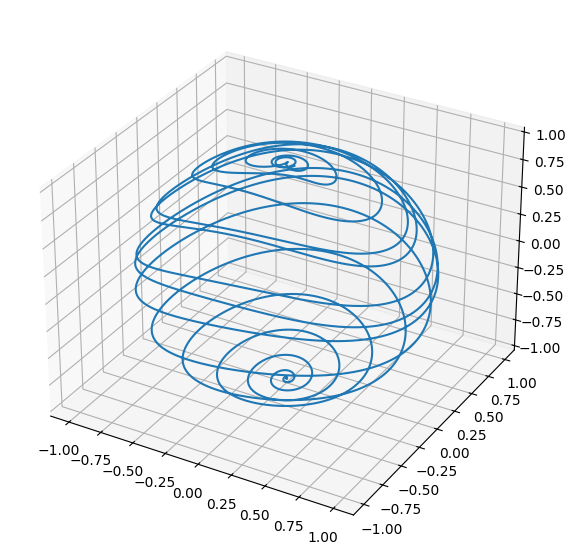

E_i = 2.373677231188696, delta_i = 0.7884692464937926

Mean : 0.06370550453802232, 
Standard deviation : 0.31622776601683794


In [7]:
simu_systeme(psi_0, 0, T, E, dt, alpha, delta_min, delta_max, p)

Pour déterminer la valeur de $\delta_{max}$ optimale (i.e. la moins contraignante assurant un redressement des spins vers $e_z$), nous avons calclulé la moyenne des norme des écarts de $\psi(T)$ à $e_z$ sur 100 spins, pour quelques valeurs de $\delta$ : 
$$\delta = 3.5 : \mu = 0.128$$
$$\delta = 3.0 : \mu = 0.097$$
$$\delta = 2.5 : \mu = 0.069$$
$$\delta = 2.0 : \mu = 0.074$$

L'écart semble se stabiliser pour $\delta_{max}\leq2.5$, nous avons donc retenu $\delta_{max} = 2.5$.


Avec cette valeur, la loi de contrôle $u$ permet d'assurer la transition des spins de $-e_z$ vers $e_z$ en un temps $T$, avec une erreur très faible.  

---
**Vocabulaire // ouverture mathématique et physique**

Pour obtenir ce contrôle robuste, on utilise le théorème adiabatique ainsi qu'une approximation de l'onde tournante. On règle par exemple la bande de fréquence à parcourir en fonction de $\alpha$ en prenant
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ 2\alpha\frac{\sin(\pi t/T)}{\pi/T}\right) 
$$
On pourra se référer à cet [article](https://www.sciencedirect.com/science/article/pii/S0022039622001401?via%3Dihub).

---

## Simulation de l'opérateur de flot

Pour améliorer l'efficacité de la simulation numérique, on souhaite pouvoir utiliser plusieurs processeurs en parallèle. Pour cela, il est possible d'exploiter le caractère linéaire de l'équation différentielle et de calculer plutôt son opérateur de flot, c'est à dire à l'application $\psi_0 \mapsto \psi(T)$ permettant de passer de la condition initiale à la solution de l'équation (3) au temps $T$. L'équation (3) étant linéaire, le flot de l'équation est une application linéaire, représentée par une matrice $U(T)\in \mathbb{R}^{3\times 3}$ ici en dimension finie, obtenue en résolvant l'équation différentielle suivante :

$$\dot U = (E \Omega_z+\delta u(t) \Omega_x ) U , \qquad U(0)= I_3 \tag{4}$$

où $I_3$ dénote la matrice identité de dimension 3. On notera bien que $U(t)$ est une matrice réelle $3\times 3$.

---
**Vocabulaire // ouverture mathématique**


L'application linéaire $U(t)$ s'appelle **matrice de transition** entre les temps 0 et $t$ en dimension finie, et plus généralement **propagateur** en mécanique quantique, et **semigroupe** dans le cadre des équations aux dérivées partielles.

---

**Question 4** On cherche à résoudre numériquement l'équation (4).

**4a** Vérifier que la connaissance de $U(t)$ permet de résoudre directement l'équation (3) car $\psi(t) = U(t) \psi_0$ pour tout $t\in [0,T]$.

**4b** Prouver que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ et justifier que le determinant de $U$ reste égal à 1. 

On en déduit que $U(t)$ reste en tout temps une matrice de rotation. On rappelle que $SO_3$ dénote l'ensemble des matrices de rotation de dimension 3.

**4c** (BONUS) Proposer une méthode de projection sur $SO_3$ et implémenter un schéma Euler avec cette projection. Indication : regarder [ici](https://en.wikipedia.org/wiki/Singular_value_decomposition#Nearest_orthogonal_matrix).

**4d** Vérifier que pour toute matrice $A$ antisymétrique telle que $(I-A)$ est inversible, $(I+A)(I-A)^{-1}\in SO_3$. En déduire que le schéma numérique suivant assure que $U^j$ reste dans $SO_3$ et vérifier qu'il est un schéma consistant d'ordre 1 pour l'équation différentielle (4):
$$U^0= I_3, \qquad U^{j+1}= \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U^j \tag{5}$$
On admettra pour cela que le développement limité $\left(I_3 - \Delta t M \right)^{-1} = I_3 + \Delta t M + O(\Delta t^2)$ est valable en matriciel.

**4e** Compléter ci-dessous l'implémentation du schéma de l'equation (5) et vérifier la solution obtenue pour $\psi(T)$ si $\psi(0)=-e_z$.

**Réponse**  
  
**4. a.** On sait que $U(t)$ est la matrice de l'application $\psi_0 \mapsto \psi(t)$ dans la base canonique $(e_x, e_y, e_z)$.  
Si on note 
$$
\psi_0 = \left(\begin{matrix}
\psi_{x,0}\\
\psi_{y,0}\\
\psi_{z,0}\\
\end{matrix}\right) 
$$
et
$$
\psi (t) = \left(\begin{matrix}
\psi_{x}(t)\\
\psi_{y}(t)\\
\psi_{z}(t)\\
\end{matrix}\right) 
$$
une solution $\psi$ de (3),  
Alors par définition de $U(t)$,
$$
\psi (t) = U(t) \psi_0
$$

Il suffit donc de poser $\psi_0 = \left(\begin{matrix}0\\0\\-1\\\end{matrix}\right)$ pour déterminer $\psi(t)$ à tout instant grâce à la connaisance de $U(t)$, et résoudre alors (3).

**4. b.** On sait que $U$ est dérivable car solution de (4), et donc $U^\top U$ l'est aussi sur $[0,T]$.  
On a donc, pour $t \in [0,T]$
$$
U(t+\epsilon)^\top U(t+\epsilon) = (U(t) + \epsilon \dot U (t) + o(\epsilon))^\top (U(t) + \epsilon \dot U (t) + o(\epsilon))
$$
Et donc
$$
U(t+\epsilon)^\top U(t+\epsilon) = U^\top U (t) + \epsilon (\dot U ^\top U (t) + U^\top \dot U (t)) + o(\epsilon)
$$
Ainsi,
$$
(U^\top U)'(t) = (\dot U ^\top U (t) + U^\top \dot U (t))
$$
Il suffit maintenant de remplacer $\dot U$ et $\dot U^\top$ par leurs valeurs, données par (4) :
$$ 
(U^\top U)' =  U^\top (E\Omega_z^\top+\delta u(t) \Omega_x^\top)U+ U^\top (E\Omega_z + \delta u(t) \Omega_x) U
$$
Or $\Omega_z$ et $\Omega_x$ sont antisymétriques, et donc $E\Omega_z^\top+\delta u(t) \Omega_x^\top = -(E\Omega_z + \delta u(t) \Omega_x)$.  
Finalement,
$$
(U^\top U)' = 0
$$
Ainsi, $U^\top U$ est constante sur $[0,T]$, or $(U^\top U)(0) = I_3$.  
On a bien pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$.  
  
On en déduit que pour tout $t\geq 0$,
$$
\det(U(t))^2 = \det((U^\top U)(t)) = \det(I_3)= 1
$$
Ainsi, pour $t\geq 0$,
$$
(\det(U(t))-1)(\det(U(t)) +1) = 0
$$
Supposons par l'absurde que $\det(U)$ ne soit pas constant. Alors : 
$$
\exists t_1, t_2 \in [0,T], t_1 \neq t_2 
$$ 
et 
$$
\det(U(t_1))=-1, \det(U(t_2)) = 1
$$

Puisque $U$ est dérivable sur $[0,T]$, $U$ est continue sur cet intervalle, et donc $\det(U)$ l'est aussi. On peut supposer sans perte de généralité que $t_1 < t_2$. Par le théorème des valeurs intermédiaires, on dispose alors de $t\in [t_1,t_2]$ tel que 

$$
\det(U(t)) = 0
$$

Mais alors $U^\top U (t)= I_3$ n'est pas inversible. C'est absurde.

On en déduit que $\det(U)$ est constant, égal à $\det(U(0))$,  
$i.e$ pour tout $t\in[0,T],$ 
$$
\det(U(t)) = \det(I_3)= 1
$$
On remarque que ce raisonnement ne dépend pas de la forme de $U$. Il suffit de disposer d'une application $f$ continue d'un intervalle non vide $I$ dans $O_3(\mathbb{R})$ pour pouvoir conclure que $\det(f)$ est constant, égal à 1 ou -1 sur $I$. Cela sera utile pour la question **4. d.**

**4. c.**
D'après l'indication, il suffit de calculer la SVD d'une matrice $A$ pour obtenir la projection de $A$ sur $O_3(\R)$, qui est alors donnée par $WV^*$ où la SVD de $A$ est $W, \Sigma, V^*$. Puisque la réponse à la question 4.b prouve que la matrice $U$ est supposée toujours de déterminant 1, il n'y a a priori pas de problème, et la projection de $U$ sur $SO_3(\R)$ est donnée par ce même produit. Toutefois, on pourrait par exemple remplacer $WV^*$ par $\det(WV^*)WV^*$, ou bien remplacer une des colonnes de $W$ ou $V$ par son opposé si le déterminant de ce produit venait à être négatif.

In [8]:
def g(t,U, E, delta):
    return (E*Omega_z + delta*u(t)*Omega_x).dot(U)

def projection_SO3(U):
    W, sigma, VT = np.linalg.svd(U)
    return(W.dot(VT))
def euler_explicit_matriciel(U_0,t_0,t_f,E,delta,dt):
    U_liste = [projection_SO3(U_0)]
    time = [t_0]
    t = t_0
    k = 0
    while t_0 + k*dt < t_f :
        U_liste.append(projection_SO3(U_liste[-1] + dt*g(t, U_liste[-1], E, delta)))
        t += dt
        time.append(t)
        k +=1

**4. d.**
Soit $A$ une matrice antisymétrique de taille 3. On sait que $A$ n'a aucune valeur propre réelle non nulle, donc $I-A$ est bien inversible.  
$$
((I+A)(I-A)^{-1})^T (I+A)(I-A)^{-1}= ((I-A)^{-1})^T (I+A)^T (I+A)(I-A)^{-1}
$$
Or pour toute matrice inversible $M$, $(M^T)^{-1} = (M^{-1})^T$, d'où : 
$$
((I+A)(I-A)^{-1})^T (I+A)(I-A)^{-1}= ((I-A)^T)^{-1} (I+A)^T(I+A)(I-A)^{-1}
$$
$i.e$
$$
((I+A)(I-A)^{-1})^T (I+A)(I-A)^{-1}= (I+A)^{-1}(I-A)(I+A)(I-A)^{-1}
$$
Or $I-A$ et $I+A$ commutent : 
$$ ((I+A)(I-A)^{-1})^T (I+A)(I-A)^{-1}= (I+A)^{-1}(I+A)(I-A)(I-A)^{-1}
$$
Et finalement,
$$
((I+A)(I-A)^{-1})^T (I+A)(I-A)^{-1}= I_3
$$ 
D'après la remarque à la fin de la question **4. b.**, on considère l'application $g:[0,1]\rightarrow O_3(\mathbb{R})$ définie par $g(t) = (I+tA)(I-tA)^{-1}$. On vient de voir que $g$ est bien définie, et l'on sait que $g$ est continue.  
En effet, $A$ est antisymétrique, donc $(I-tA)$ est inversible pour tout $t\in[0,1]$, or $M\mapsto M^{-1}$ est continue sur $GL_3(\mathbb{R})$ (car $M^{-1}$ s'exprime en fonction de l'inverse du déterminant de $M$ et de sa comatrice), d'où la continuité de $g$ par composition.  
Or on a montré en **4. b.** qu'alors $\det(g)$ était constant, égal à -1 ou +1.  
  
Sachant que $\det(g(0)) = \det(I_3) = 1$, on en déduit que pour tout $t\in[0,1]$, $\det(g(t))=1$.  
  
Finalement, $(I+A)(I-A)^{-1}\in SO_3(\mathbb{R})$.

L'équation (4) se réécrit 
$$\dot U = f(t,U) , \qquad U(0)= I_3 
$$
Où

$$\begin{array}{ccccc}
f & : & [0,T]\times \mathbb{R}^{3\times3} & \longrightarrow & \mathbb{R}^{3\times3} \\
 & & t, U & \longmapsto & f(t, U) = (E \Omega_z+\delta u(t) \Omega_x ) U \\
\end{array}$$

Le schéma proposé introduit

$$\begin{array}{ccccc}
\phi & : & [0,T]\times \mathbb{R}^{3\times3}\times \mathbb{R}^{+*} & \longrightarrow & \mathbb{R}^{3\times3} \\
 & & t, U, \Delta t & \longmapsto & \phi (t,U,\Delta t) = \frac{(V(t,\Delta t) - I_3)U}{\Delta t} \\
\end{array}$$
Avec
$$ 
V(t,\Delta t) = \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1}
$$
$V(t,\Delta t)$ est bien définie car $E \Omega_z+\delta u(t) \Omega_x$ est antisymétrique, et donc $\frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )$ aussi, et que l'on peut donc lui appliquer le résultat vu plus haut.  
  
$u$ étant $C^1$ sur $[0,T]$, $t\mapsto f(t,U(t))$ l'est aussi par produit. On en déduit que toute solution de (4) est de classe $C^2$ sur $[0,T]$.

On introduit maintenant, pour $J$ le nombre total d'intervalles de temps considérés, de longueur régulière égale à $\Delta t$, 
$$
\eta^{j+1} = \frac{(U(t_{j+1}) - U(t_j))}{\Delta t} - \phi(t_j,U(t_j), \Delta t)
$$
Où $j\in \{1,...,J-1\}$.
Il s'agit de montrer qu'il existe $c_s$ une constante indépendante de $j$ telle que $\lVert \eta^{j+1} \rVert \leq c_s \Delta t_j$.  
$$
\eta^{j+1} = \frac{U(t_j)+\Delta t  U'(t_j) + \frac{\Delta t^2}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - U(t_j)}{\Delta t}- \phi(t_j,U(t_j), \Delta t)
$$
d'après la formule de Taylor reste intégral appliquée à $U$ en $t_{j+1} = t_j + \Delta t$, qui est bien de classe $C^2$.
Ainsi,
$$
\eta^{j+1} = U'(t_j) + \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - \phi(t_j,U(t_j), \Delta t)
$$
$i.e$
$$
\eta^{j+1} = f(t_j,U(t_j)) + \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - \phi(t_j,U(t_j), \Delta t)
$$
Il vient
$$
\eta^{j+1} = f(t_j,U(t_j)) + \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - \frac{(V(t_j,\Delta t) - I_3)}{\Delta t}U(t_j)
$$
On utilise maintenant le développement limité proposé par l'énoncé pour $V(t_j,\Delta t)$ :
$$
V(t_j,\Delta t) = (I_3 + \frac{\Delta t}{2} (E\Omega_z + \delta u(t_j) \Omega_x))(I_3 + \frac{\Delta t}{2}(E\Omega_z + \delta u(t_j) \Omega_x) + O(\Delta t^2))
$$
D'où
$$ 
V(t_j,\Delta t) = I_3 + \Delta t (E\Omega_z + \delta u(t_j) \Omega_x) + O(\Delta t ^2)
$$
Il vient 
$$
\eta^{j+1} = f(t_j,U(t_j)) + \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - \frac{\Delta t (E\Omega_z + \delta u(t_j) \Omega_x) + O(\Delta t ^2)}{\Delta t}U(t_j)
$$
$i.e$
$$
\eta^{j+1} = f(t_j,U(t_j)) + \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds - ((E\Omega_z + \delta u(t_j) \Omega_x) + O(\Delta t ))U(t_j)
$$
Et puisque l'expression de $f(t_j, U(t_j))$ est connue et vaut $(E\Omega_z + \delta u(t_j) \Omega_x)U(t_j)$:
$$ 
\eta^{j+1} = \frac{\Delta t}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds +  O(\Delta t )
$$
Soit : 
$$
\eta^{j+1} = \Delta t( \frac{1}{2} \int_0^1 U''(t_j + s \Delta t)(1-s) ds +  O(1))
$$
Et donc
$$
\lVert \eta^{j+1} \rVert \leq \Delta t (\lVert \int_0^1 U''(t_j + s \Delta t)(1-s) ds \rVert + O(1))
$$
On peut majorer l'intégrale qui apparaît dans la parenthèse par $\max_ {0\leq j\leq J-1} \lVert\int_0^1 U''(t_j + s \Delta t)(1-s) ds \rVert$ qui est bien défini.
D'autre part, les notations ne le laissent pas voir, mais le $O(1)$ dépend lui aussi de $j$, sauf qu'il suffit de le majorer uniformément par rapport à $j$, en considérant le maximum des majorants des $O(1)$ pour $j$ parcourant $\{0,...,J-1\}$.
  
Finalement, on a bien trouvé une constante $c_s$ telle que
$$
\lVert \eta^{j+1} \rVert \leq c_s \Delta t
$$
  
On a donc montré la consistance d'ordre au moins 1 du schéma proposé.






Valeur finale de psi : [-0.00346685 -0.00148028  0.99999289]


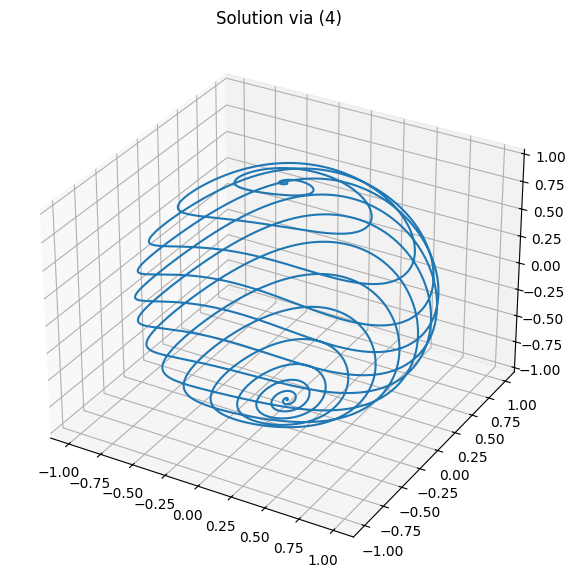

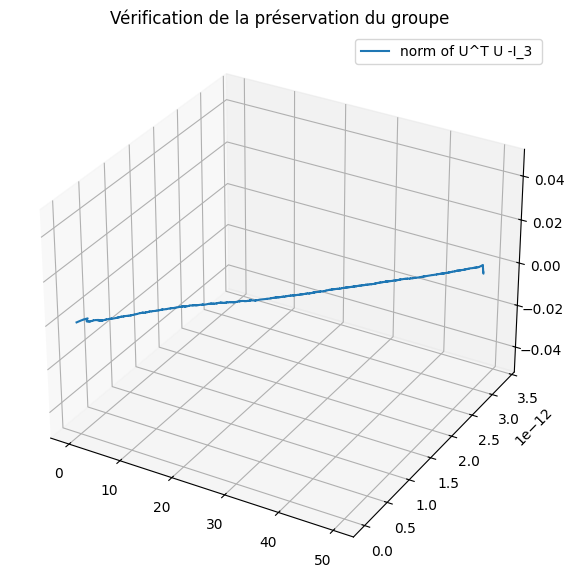

In [9]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        sol[j+1]= np.dot((I+(dt/2)*(E*Omega_z + delta*u(t)*Omega_x)).dot(np.linalg.inv(I-(dt/2)*(E*Omega_z + delta*u(t)*Omega_x))),sol[j])
    return temps,sol

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")

---
**Vocabulaire // ouverture mathématique**


$SO_3$ est à la fois un groupe et une variété différentielle (avec une structure compatible avec les lois du groupe), c'est ce que l'on appelle un **groupe de Lie**. Les matrices $\Omega_x,\Omega_y,\Omega_z$ jouent un rôle particulier et forment ce que l'on appelle (les générateurs de) l'**Algèbre de Lie** du groupe.

Par ailleurs, le schéma proposé dans l'équation (4) est à la fois relié à la **transformation de Cayley** d'une matrice unitaire, et à une famille de schémas que l'on nomme **approximations de Padé**.


---

## BONUS : Parallélisation de la simulation de systèmes linéaires

**Question 5** On suppose que l'on dispose de $N$ processeurs. Expliquer comment exploiter le calcul de la matrice de transition de la question précédente pour résoudre l'équation (2) de manière parallèle. Commenter le gain (ou non) en terme de temps d'exécution. 

---
**Vocabulaire // ouverture mathématique**

Lorsque l'équation n'est pas linéaire, paralléliser en temps la résolution d'une équation différentielle est un sujet difficile. Il est possible d'utiliser des méthodes  de type **Parareal**.

---